In [211]:
# 导入类库
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [210]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.base import clone
from sklearn.preprocessing import Imputer

In [212]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [18]:
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据理解

## 1.1 概览

In [22]:
# 导入数据
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [23]:
# 查看前几行数据
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
print('训练集维度：%s，测试集维度：%s' % (train_df.shape, test_df.shape))

训练集维度：(1460, 81)，测试集维度：(1459, 80)


In [37]:
# 查看数据基本信息
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [25]:
# 查看int64型数据统计信息
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.2 分析SalePrice

In [26]:
# SalePrice统计信息
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

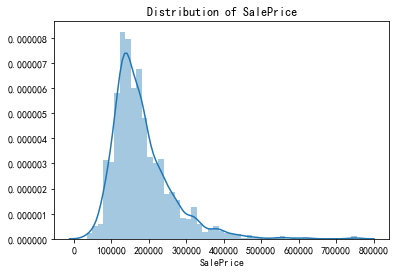

In [27]:
# SalePrice直方图
# seaborn作直方图默认画出密度曲线，所以曲线下面积恒为1，所以纵轴大小很小
# 为了打中文，可在前面加上一个u
plt.figure()
sns.distplot(train_df['SalePrice'])
plt.title('Distribution of SalePrice')
plt.show()

In [28]:
# 计算峰度和偏度
print('峰度(Kurtosis):%s ' % train_df['SalePrice'].kurt())
print('偏度(Skewness):%s ' % train_df['SalePrice'].skew())

峰度(Kurtosis):6.536281860064529 
偏度(Skewness):1.8828757597682129 


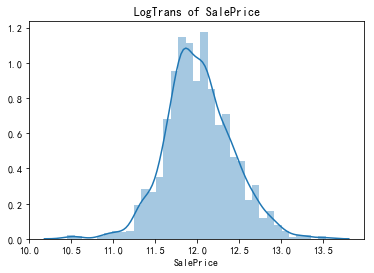

In [29]:
#从上图可以看出，SalePrice高峰陡峭，右偏长尾分布。因此可以对变量做对数变换，使其呈现正常的正态分布。
plt.figure()
sns.distplot(np.log(train_df['SalePrice']))
plt.title('LogTrans of SalePrice')
plt.show()

## 1.3 分析特征变量

In [30]:
#特征变量按照数据类型分成定量变量和定性变量
quantitative = [feature for feature in train_df.columns if train_df.dtypes[feature] != 'object'] # 定量变量
quantitative.remove('Id')
quantitative.remove('SalePrice')
qualitative = [feature for feature in train_df.columns if train_df.dtypes[feature] == 'object'] # 定性变量

### 1.3.1 定量变量（m_cont）

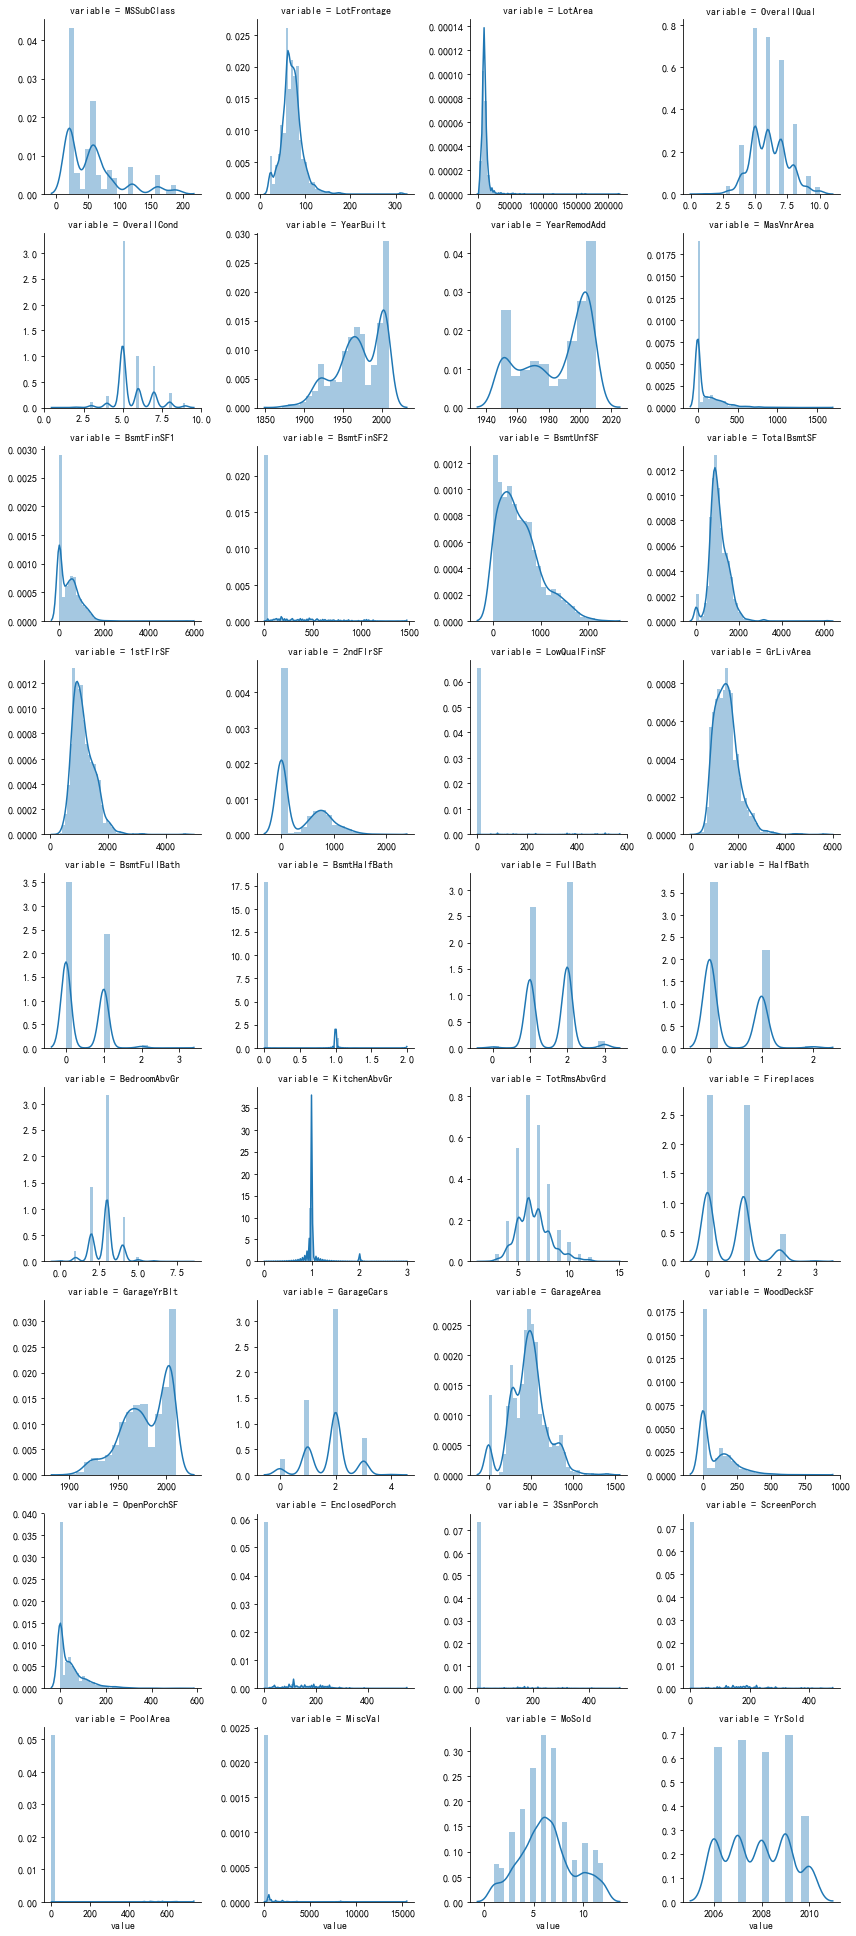

In [32]:
# 定量变量直方图
m_cont = pd.melt(train_df, value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, 'value')

#### PS:上图中有些变量类似正态分布，可以做对数变换提升数据质量，适合的对象有LotFrontage, TotalBsmtSF, 1stFlrSF，LotArea, GrLivArea

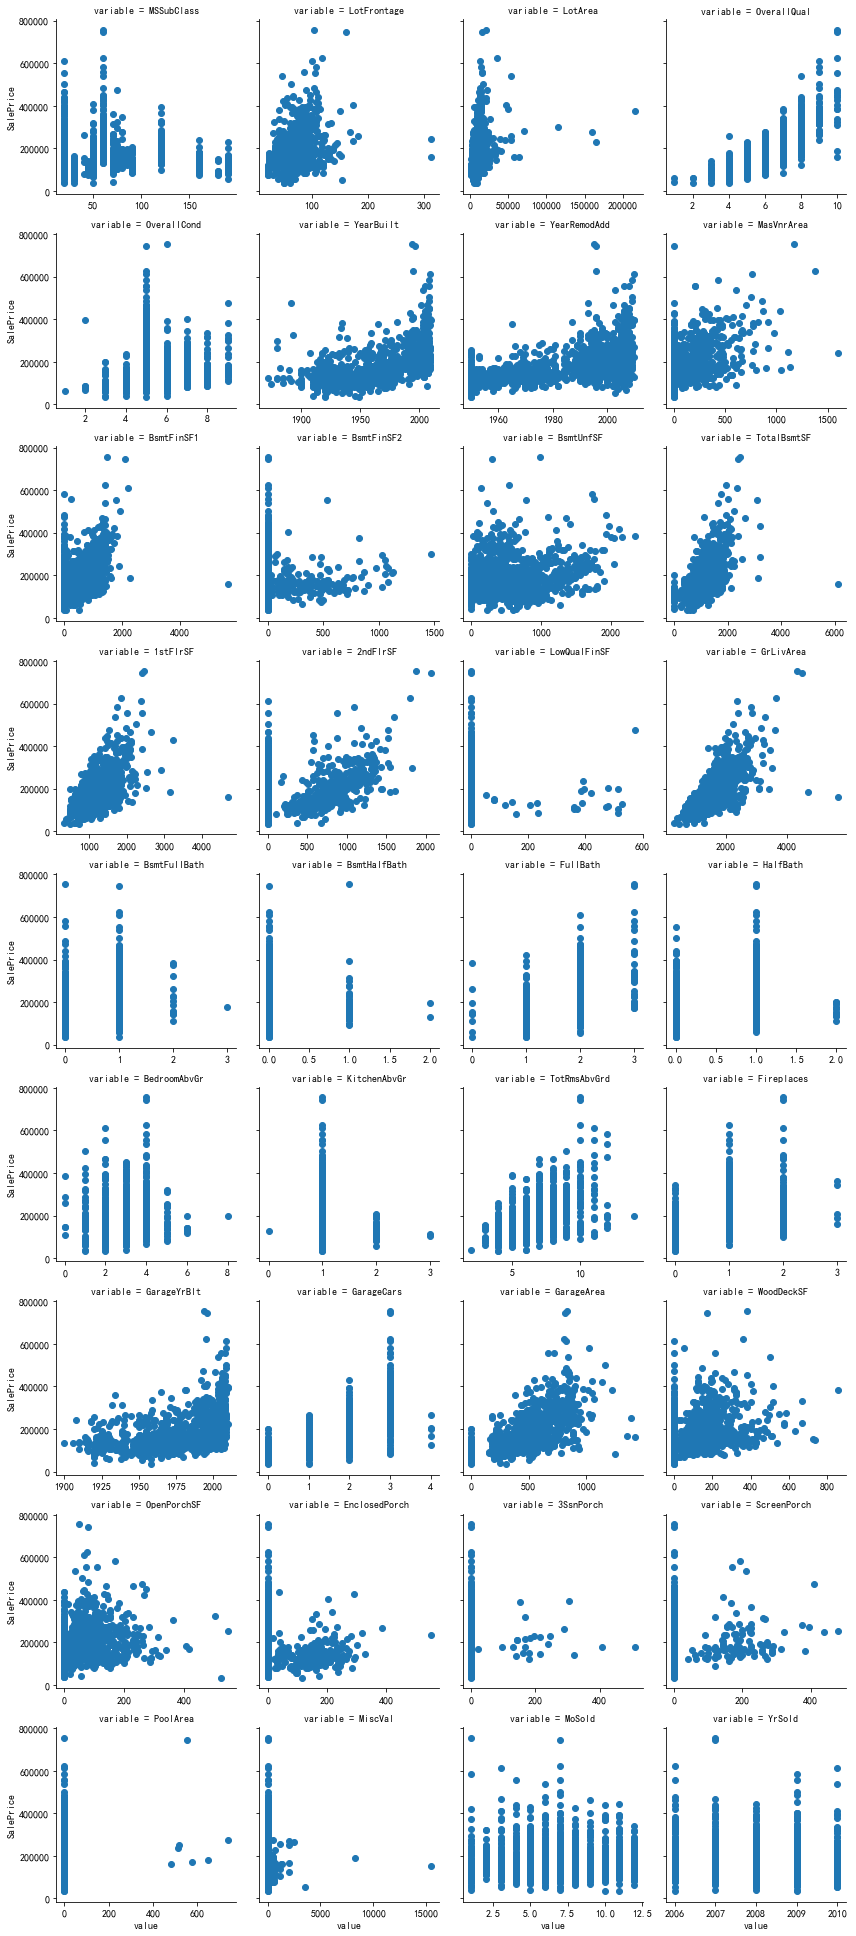

In [33]:
# 定量变量与房价关系图
m_cont = pd.melt(train_df, id_vars='SalePrice', value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=True)
g.map(plt.scatter, 'value', 'SalePrice')

### 1.3.2 定性变量（m_disc）

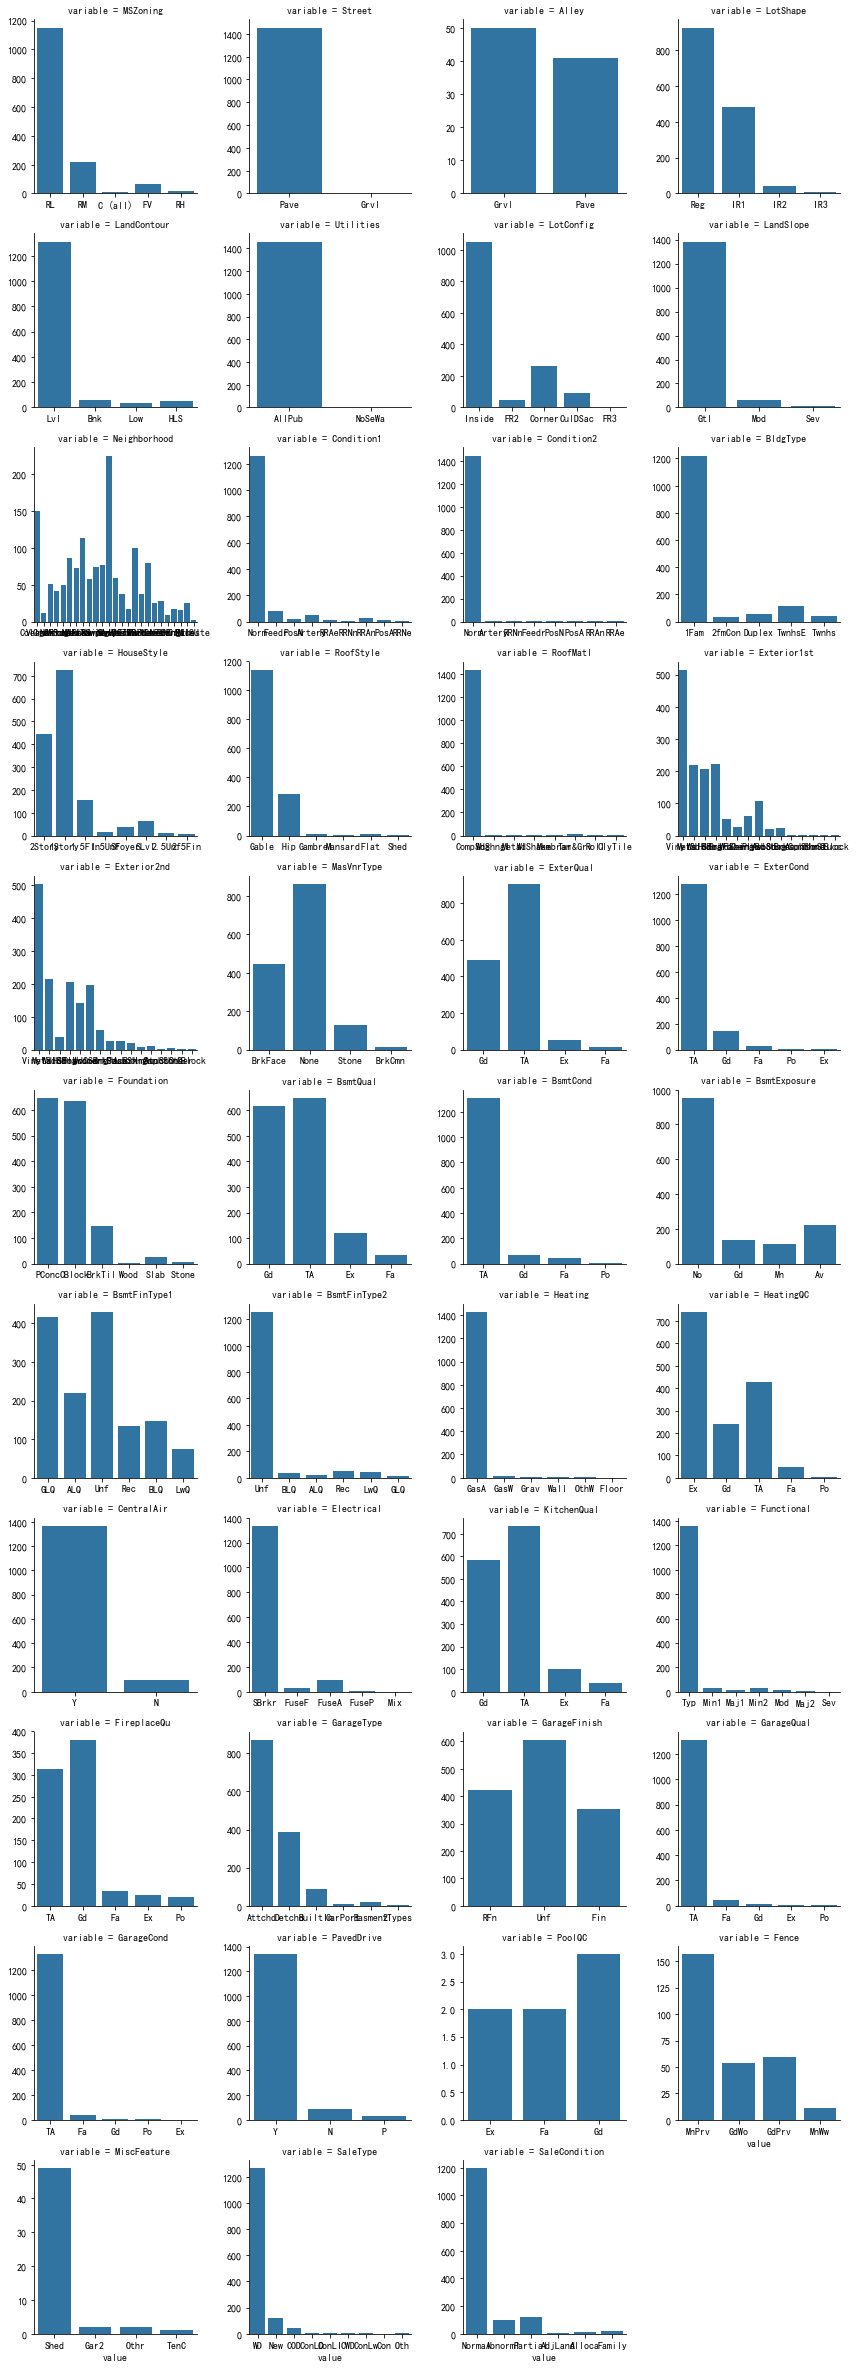

In [34]:
# 定性变量频数统计图
m_disc = pd.melt(train_df, value_vars=qualitative)
g = sns.FacetGrid(m_disc, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.countplot, 'value')

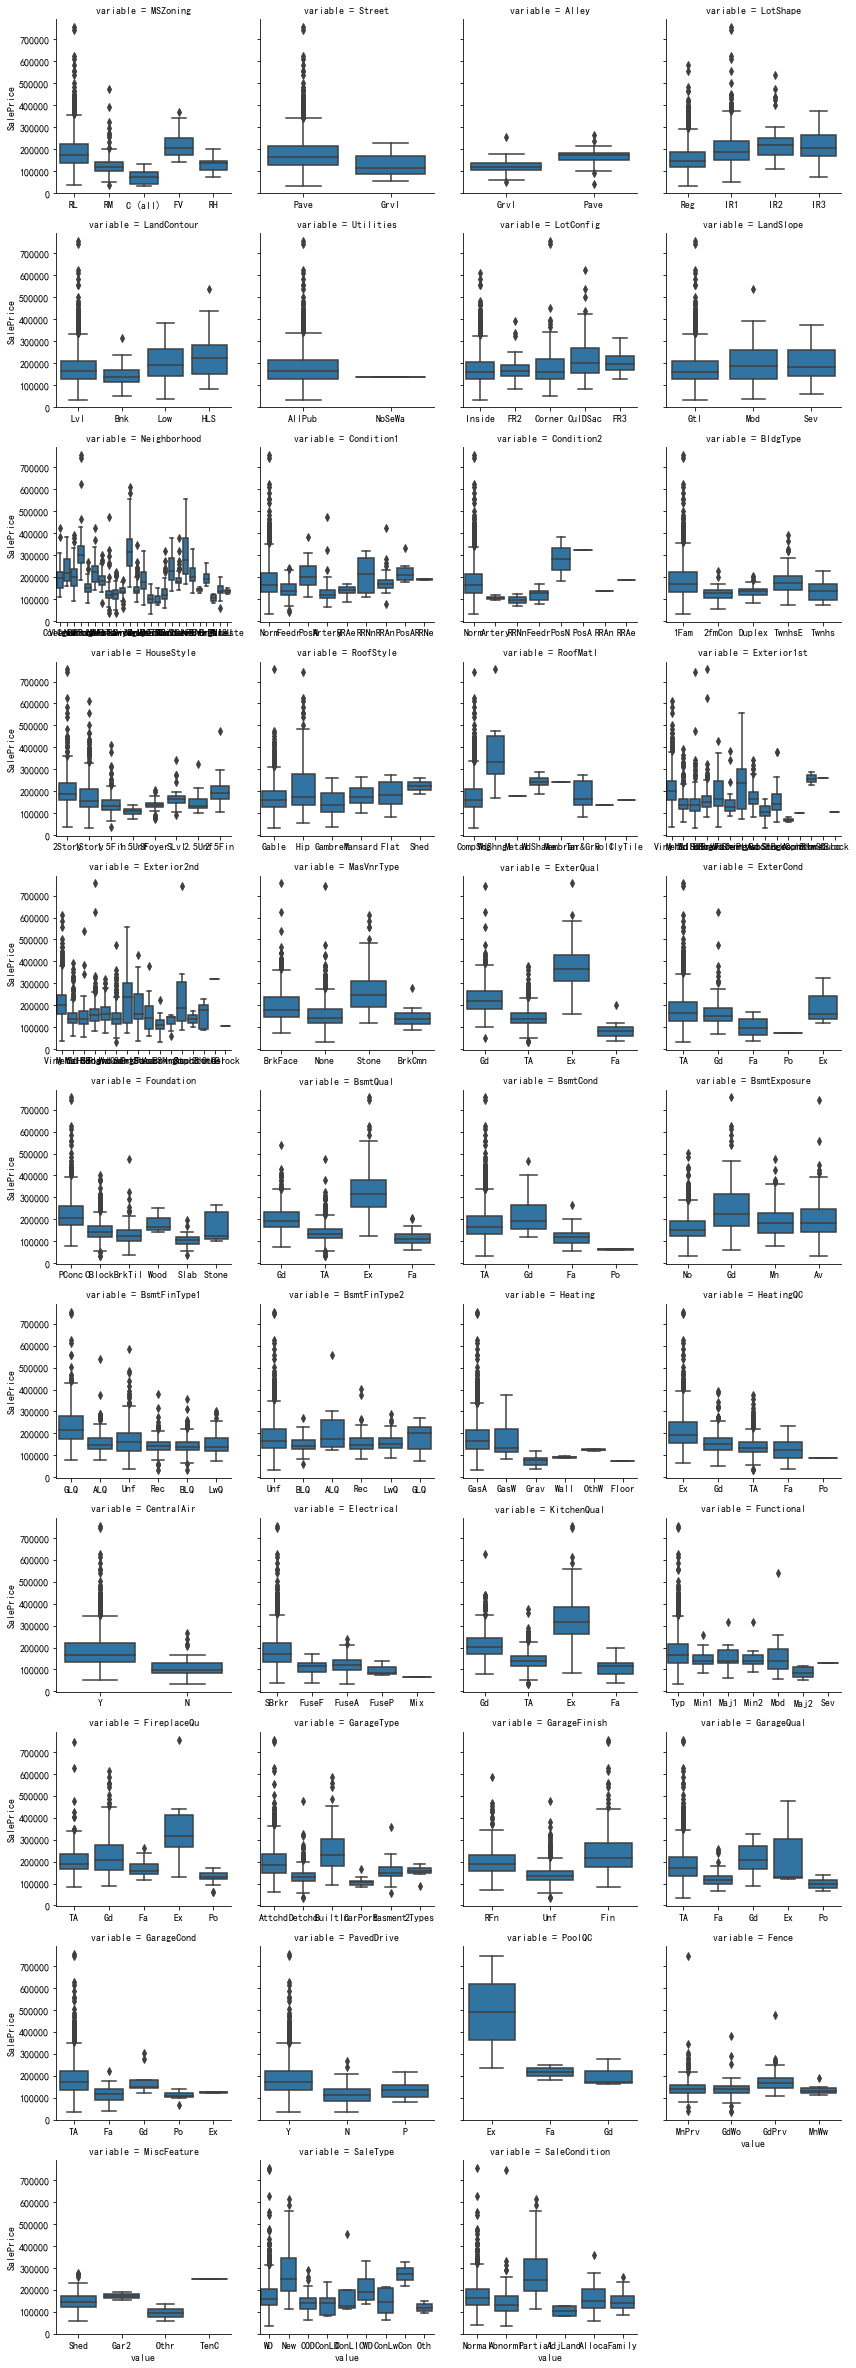

In [36]:
# 定性变量与房价关系图
m_disc = pd.melt(train_df, id_vars='SalePrice', value_vars=qualitative)
g = sns.FacetGrid(m_disc, col='variable', col_wrap=4, sharex=False, sharey=True)
g.map(sns.boxplot, 'value', 'SalePrice')

#### PS:方差分析（Analysis of Variance，简称ANOVA），分析定性变量对SalePrice的影响

In [37]:
def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    p_vals = []
    for fea in qualitative:
        samples = []
        cls = frame[fea].unique() # 变量的类别值
        for c in cls:
            c_array = frame[frame[fea]==c]['SalePrice'].values
            samples.append(c_array)
        p_val = stats.f_oneway(*samples)[1] # 获得p值,p值越小，对SalePrice的显著性影响越大
        p_vals.append(p_val)
    anv['pval'] = p_vals
    return anv.sort_values('pval')

In [38]:
a = anova(train_df, qualitative)
a['disparity'] = np.log(1./a['pval'].values) # 对SalePrice的影响悬殊度

In [40]:
a

,feature,pval,disparity
8,Neighborhood,1.558600e-225,517.637858
18,ExterQual,1.439551e-204,469.363028
30,KitchenQual,3.032213e-192,440.987045
20,Foundation,5.791895e-91,207.778784
27,HeatingQC,2.667062e-67,153.292224
42,SaleCondition,7.988268e-44,99.235770
15,Exterior1st,2.586089e-43,98.061012
16,Exterior2nd,4.842186e-43,97.433793
41,SaleType,5.039767e-42,95.091214
0,MSZoning,8.817634e-35,78.413725


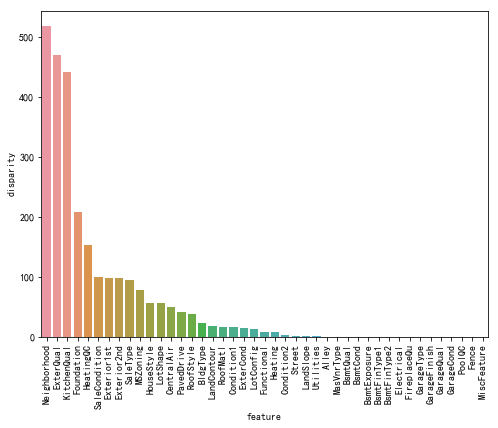

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='feature', y='disparity', data=a)
plt.xticks(rotation=90)
plt.show()

In [43]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering['val']
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature)['SalePrice'].mean()
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = np.arange(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict() # 返回的数据样例{category1:1, category2:2, ...}
    
    # 对frame[feature]编码
    for category, code_value in ordering.items():
        frame.loc[frame[feature]==category, feature+'_E'] = code_value

In [44]:
qual_encoded = []
for qual in qualitative:
    encode(train_df, qual)
    qual_encoded.append(qual+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


### 1.3.3 相关性

In [45]:
#计算特征变量与房价的spearman相关系数
def spearman(frame, features):
    spr =  pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(x='spearman', y='feature', data=spr)

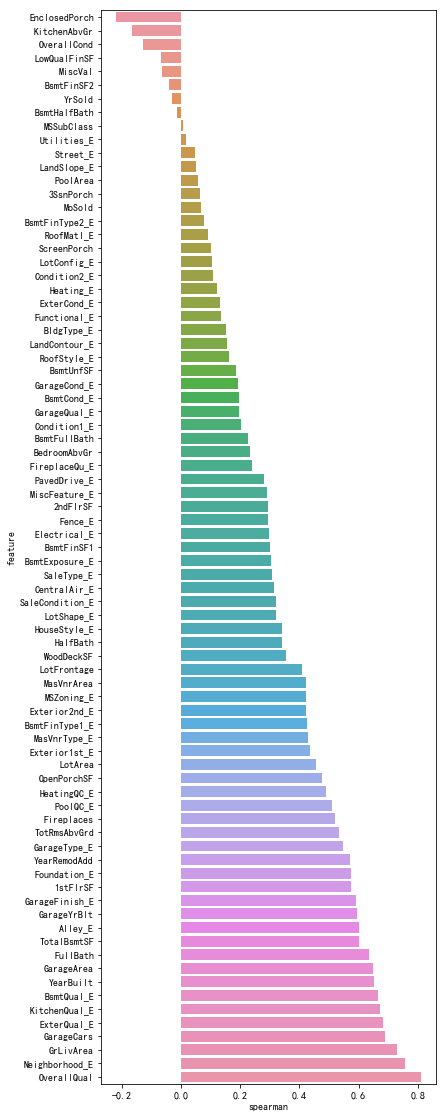

In [46]:
spearman(train_df, quantitative+qual_encoded)

Text(0.5,1,'corr between m_cont & m_disc')

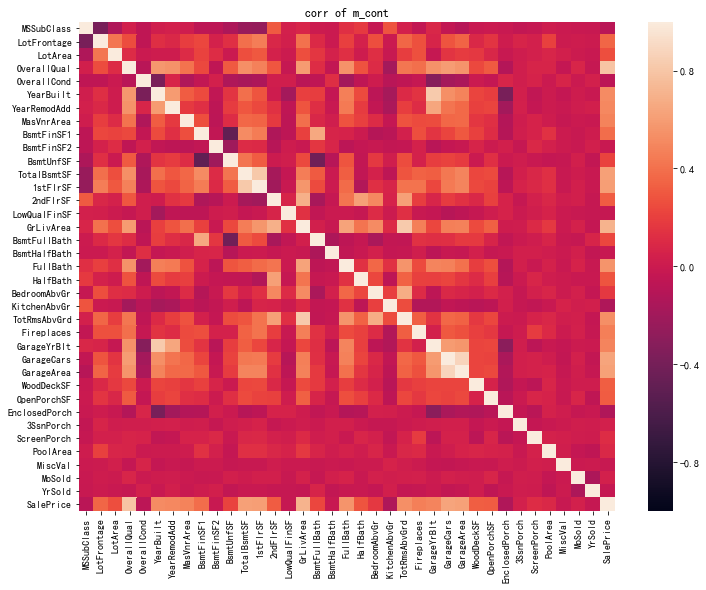

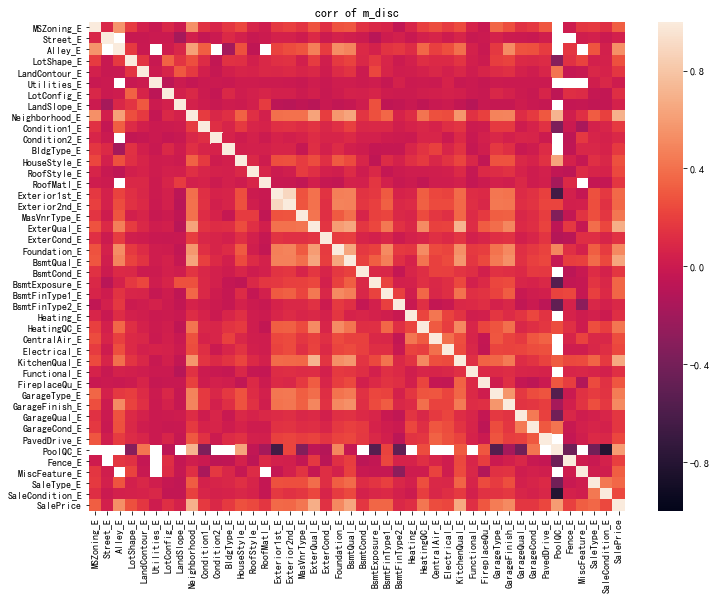

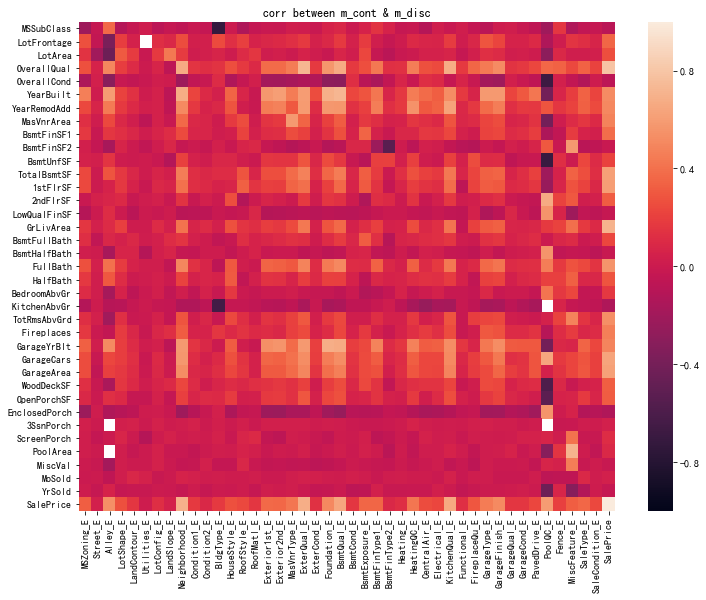

In [47]:
# 分析定量变量之间、定性变量之间、定量变量与定性变量之间的相关性
plt.figure(1, figsize=(12,9))
corr = train_df[quantitative+['SalePrice']].corr()
sns.heatmap(corr, vmin=-1, vmax=1)
plt.title('corr of m_cont')

plt.figure(2, figsize=(12,9))
corr = train_df[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr, vmin=-1, vmax=1)
plt.title('corr of m_disc')

plt.figure(3, figsize=(12,9))
corr = pd.DataFrame(np.zeros((len(quantitative)+1, len(qual_encoded)+1)), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train_df[q1].corr(train_df[q2])
sns.heatmap(corr, vmin=-1, vmax=1)
plt.title('corr between m_cont & m_disc')

### 1.4 房价分段
#### （房价分成高价格、标准价格两个等级，分析定量变量与不同价格段的关系）

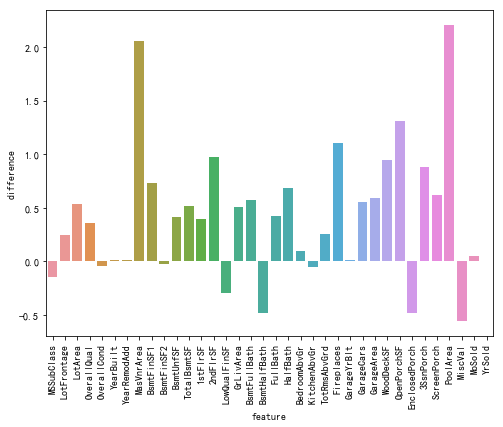

In [48]:
standard = train_df[train_df['SalePrice'] < 200000]
pricey = train_df[train_df['SalePrice'] >= 200000]

features = quantitative

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].mean()-standard[f].mean())/standard[f].mean() for f in features]

plt.figure(figsize=(8, 6))
sns.barplot(x='feature', y='difference', data=diff)
plt.xticks(rotation=90)
plt.show()

#### PS：房价以200000为分界点，价格高的房屋有泳池(PoolArea)，装饰石材(MasVnrArea)，开放门廊(OpenPorchSF)

# 2. 数据清洗

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 2.1 离群点处理

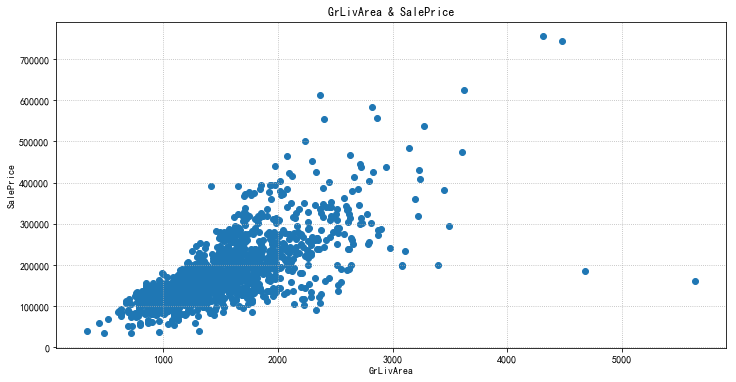

In [50]:
plt.figure(figsize=(12,6))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea & SalePrice')
plt.grid(b=True, ls=':')
plt.show()

In [51]:
# 删除两个离群点
train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<200000)].index, inplace=True)

In [52]:
# 合并训练集和测试集，便于同时对两个数据集进行数据清洗和特征工程
full = pd.concat([train, test], axis=0, ignore_index=True)

In [53]:
train.shape, test.shape, full.shape

((1458, 81), (1459, 80), (2917, 81))

#### PS：可以看到，数据集变小了

## 2.2 缺失值处理

In [54]:
# 查看缺失值
missing_count = full.isnull().sum()
missing_count = missing_count[missing_count > 0].sort_values(ascending=False)
missing_rate = missing_count / len(full)

missing = pd.DataFrame()
missing['count'] = missing_count
missing['rate'] = missing_rate

In [55]:
missing

,count,rate
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
SalePrice,1459,0.500171
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageQual,159,0.054508
GarageCond,159,0.054508
GarageFinish,159,0.054508


### 2.2.1 LotFrontage缺失值处理

In [56]:
train_df[quantitative+qual_encoded].corr('spearman')['LotFrontage'].sort_values(ascending=False)

LotFrontage       1.000000
LotArea           0.649633
1stFlrSF          0.427678
TotalBsmtSF       0.386206
BldgType_E        0.382984
GarageArea        0.378052
GrLivArea         0.375844
TotRmsAbvGrd      0.365999
GarageCars        0.351756
GarageType_E      0.348671
BedroomAbvGr      0.327679
Neighborhood_E    0.323136
MSZoning_E        0.302206
GarageFinish_E    0.260403
MasVnrArea        0.258906
OverallQual       0.254952
Fireplaces        0.245315
PoolQC_E          0.239046
FullBath          0.220234
RoofStyle_E       0.217191
MasVnrType_E      0.209824
MiscFeature_E     0.202410
YearBuilt         0.194510
ExterQual_E       0.181257
KitchenQual_E     0.179944
OpenPorchSF       0.178073
BsmtQual_E        0.176764
BsmtExposure_E    0.165744
BsmtFinSF1        0.154014
PavedDrive_E      0.149020
                    ...   
GarageCond_E      0.081133
ExterCond_E       0.077701
BsmtCond_E        0.066438
3SsnPorch         0.063960
RoofMatl_E        0.056644
2ndFlrSF          0.055111
L

In [58]:
full['LotAreaCut'] = pd.qcut(full['LotArea'], 10)

In [59]:
full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].agg(['count', 'mean', 'median'])

count        mean  median
LotAreaCut          Neighborhood                           
(1299.999, 4921.8]  Blmngtn          20   46.900000    43.0
                    Blueste          10   27.300000    24.0
                    BrDale           30   21.500000    21.0
                    BrkSide           4   52.000000    51.0
                    ClearCr           0         NaN     NaN
                    CollgCr           4   36.750000    37.0
                    Crawfor           9   45.666667    44.0
                    Edwards          15   36.333333    35.0
                    IDOTRR            5   48.200000    46.0
                    MeadowV          33   25.606061    21.0
                    Mitchel           4   32.000000    32.0
                    NAmes             3   33.666667    34.0
                    NPkVill          21   28.142857    24.0
                    NridgHt          10   37.600000    36.0
                    OldTown          25   57.760000    56.0
                    SWISU             4   62.500000    63.0
                    Sawyer            1   50.000000    50.0
                    Somerst          47   32.787234    32.0
                    StoneBr           4   37.250000    39.0
                    Timber            2   44.000000    44.0
(4921.8, 7007.2]    BrkSide          67   53.059701    51.0
                    ClearCr           1   92.000000    92.0
                    CollgCr           5   66.400000    64.0
                    Crawfor           9   59.111111    53.0
                    Edwards          20   63.200000    64.5
                    IDOTRR           23   59.130435    60.0
                    Mitchel           8   54.750000    59.5
                    NAmes            13   63.461538    66.0
                    NPkVill           0         NaN     NaN
                    NridgHt          17   43.294118    47.0
...                                 ...         ...     ...
(12196.8, 14285.8]  NAmes            22   81.590909    78.0
                    NWAmes            9   88.111111    90.0
                    NoRidge           7   89.285714    89.0
                    NridgHt          51  102.588235   104.0
                    OldTown           8   78.500000    75.0
                    Sawyer           15   75.600000    81.0
                    SawyerW          17   73.764706    66.0
                    Somerst          10   93.500000    99.0
                    StoneBr           9   81.111111    82.0
                    Timber           15   81.600000    85.0
(14285.8, 215245.0] BrkSide           1  144.000000   144.0
                    ClearCr          10   91.100000    80.5
                    CollgCr          12   64.083333    65.5
                    Crawfor          17   81.352941    80.0
                    Edwards          14   87.714286    79.0
                    Gilbert          17  102.058824   100.0
                    IDOTRR            3  103.000000   109.0
                    Mitchel          13  106.769231   100.0
                    NAmes            16  115.937500   104.0
                    NWAmes            5   63.000000    56.0
                    NoRidge          12  101.333333   106.0
                    NridgHt          27  105.111111   110.0
                    OldTown           6   95.333333    90.0
                    SWISU             1  102.000000   102.0
                    Sawyer            8   86.625000    93.5
                    SawyerW           5   84.600000    90.0
                    Somerst           5   61.600000    49.0
                    StoneBr          11   73.363636    63.0
                    Timber           12   95.916667    89.0
                    Veenker           7   86.857143    95.0

[183 rows x 3 columns]

In [60]:
full['LotFrontage'] = full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [61]:
# 由于某些分组没有数据，因此未填补的缺失值单独利用LotAreaCut填充
full['LotFrontage'] = full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### 2.2.2 某些类别变量有缺失值是因为没有这个属性，填补'None' 
####           比如PoolQC(泳池质量)，缺失值是因为这个房子没有泳池）

In [62]:
cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    full[col] = full[col].fillna('None')

### 2.2.3 某些数值变量有缺失值是因为没有这个属性，填补0
####           比如GarageArea(车库面积)，缺失值是因为这个房子没有车库

In [63]:
cols2 = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols2:
    full[col] = full[col].fillna(0)

### 2.2.4 其他缺失值变量都是离散变量，缺失值数目较少，用众数填补

In [64]:
cols3 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols3:
    full[col] = full[col].fillna(full[col].mode()[0])

### 2.2.5 检查有无缺失值

In [65]:
full.isnull().sum()[full.isnull().sum()>0] # 缺失值填补完毕

SalePrice    1459
dtype: int64

In [66]:
full.drop('LotAreaCut', axis=1, inplace=True)

In [67]:
full.shape

(2917, 81)

# 3. 特征工程

## 3.1 某些数值特征转化为类别特征
#### 一些数值特征表示的意义是类别属性，比如MSSubClass(建筑等级)，这里将其转换为字符串，便于进行标签编码和独热编码。

In [68]:
Num_to_Str = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for col in Num_to_Str:
    full[col] = full[col].astype(str)

## 3.2 有序特征编码

In [69]:
full.groupby(['MSSubClass'])['SalePrice'].agg(['count', 'mean', 'median']).sort_values('median')

,count,mean,median
MSSubClass,,,
180,10,102300.000000,88500.0
30,69,95829.724638,99900.0
45,12,108591.666667,107500.0
190,30,129613.333333,128250.0
50,144,143302.972222,132000.0
90,52,133541.076923,135980.0
85,20,147810.000000,140750.0
40,4,156125.000000,142500.0
160,63,138647.380952,146000.0


In [70]:
# 定义映射函数
def map_values(df):
    df['MSSubClass'] = df['MSSubClass'].map({'180':1,
                                             '30':2, '45':2,
                                             '190':3, '50':3, '90':3, 
                                             '85':4, '40':4, '160':4, 
                                             '70':5, '20':5, '75':5, '80':5, '150':5,
                                             '120': 6, '60':6})
    
    df['MSZoning'] = df['MSZoning'].map({'C (all)':1, 'RM':2, 'RH':2, 'RL':3, 'FV':4})
    
    df['Neighborhood'] = df['Neighborhood'].map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    df['HouseStyle'] = df['HouseStyle'].map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df['ExterCond'] = df['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df['Foundation'] = df['Foundation'].map({'Slab':1, 'BrkTil':2, 'CBlock':2, 'Stone':2, 'Wood':3, 'PConc':4})
    
    df['BsmtQual'] = df['BsmtQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    
    df['BsmtCond'] = df['BsmtCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    
    df['BsmtExposure'] = df['BsmtExposure'].map({'None':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5})
    
    df['BsmtFinType1'] = df['BsmtFinType1'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})
    
    df['BsmtFinType2'] = df['BsmtFinType2'].map({'None':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})
    
    df['HeatingQC'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df['KitchenQual'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df['Functional'] = df['Functional'].map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    df['FireplaceQu'] = df['FireplaceQu'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    
    df['GarageFinish'] = df['GarageFinish'].map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    df['GarageQual'] = df['GarageQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    
    df['GarageCond'] = df['GarageCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
    
    df['PavedDrive'] = df['PavedDrive'].map({'N':1, 'P':2, 'Y':3})
    
    df['PoolQC'] = df['PoolQC'].map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df['Fence'] = df['Fence'].map({'None':1, 'MnWw':2, 'GdWo':3, 'MnPrv':4, 'GdPrv':5})

In [71]:
# 有序特征编码
map_values(full)

## 3.3 时间特征编码

In [72]:
lab = LabelEncoder()
full['YearBuilt'] = lab.fit_transform(full['YearBuilt'])
full['YearRemodAdd'] = lab.fit_transform(full['YearRemodAdd'])
full['GarageYrBlt'] = lab.fit_transform(full['GarageYrBlt'])

## 3.4 数据转换

In [73]:
full.drop(['SalePrice', 'Id'], axis=1, inplace=True)

In [74]:
# 数据做一备份
full_fe = full.copy()
full_fe.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,4,2,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,110,53,2008
1,1262,0,0,None,3,1Fam,4,5,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,83,26,2007
2,920,866,0,None,3,1Fam,4,3,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,108,52,2008
3,961,756,0,None,3,1Fam,5,2,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,25,20,2006
4,1145,1053,0,None,4,1Fam,4,4,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,107,50,2008


In [75]:
# 对于偏度大于1的定量变量进行对数变换
full_numeric = full_fe.select_dtypes(exclude='object')
skew = full_numeric.apply(lambda x: x.skew())
skew_features = skew[abs(skew) >= 1].index
full_fe[skew_features] = np.log1p(full_fe[skew_features])

## 3.5 one-hot编码

In [76]:
full_fe = pd.get_dummies(full_fe)

In [77]:
full_fe.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,6.753438,854,0.0,3,1.609438,1.098612,706.0,0.0,7,1.098612,...,1,0,1,1,0,0,0,1,0,0
1,7.141245,0,0.0,3,1.609438,1.791759,978.0,0.0,6,1.098612,...,1,0,1,1,0,0,1,0,0,0
2,6.825460,866,0.0,3,1.609438,1.386294,486.0,0.0,7,1.098612,...,1,0,1,1,0,0,0,1,0,0
3,6.869014,756,0.0,3,1.791759,1.098612,216.0,0.0,6,1.098612,...,1,0,1,1,0,1,0,0,0,0
4,7.044033,1053,0.0,4,1.609438,1.609438,655.0,0.0,7,1.098612,...,1,0,1,1,0,0,0,1,0,0


## 3.6 RobustScaler

In [78]:
scaler = RobustScaler()

In [79]:
# 分离训练集和测试集
n_train = train.shape[0]
train_X = full_fe[:n_train]
test_X = full_fe[n_train:]
train_y = train['SalePrice']

In [80]:
# 区间缩放
# 注意事项：不能分别对训练集和测试集训练与转换，应该在训练集上训练，在测试集上转换
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.log(train_y)

## 3.7 特征选择

In [81]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_X, train_y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lasso_fi = pd.DataFrame({'feature_importance':lasso.coef_}, index=full_fe.columns)

In [83]:
lasso_fi.sort_values('feature_importance', ascending=False)

,feature_importance
OverallQual,0.113968
GrLivArea,0.101291
2ndFlrSF,0.083288
YearBuilt,0.070143
1stFlrSF,0.060061
TotalBsmtSF,0.056913
SaleType_New,0.052324
Neighborhood,0.050658
OverallCond,0.047451
MSZoning,0.044817


<Figure size 432x288 with 0 Axes>

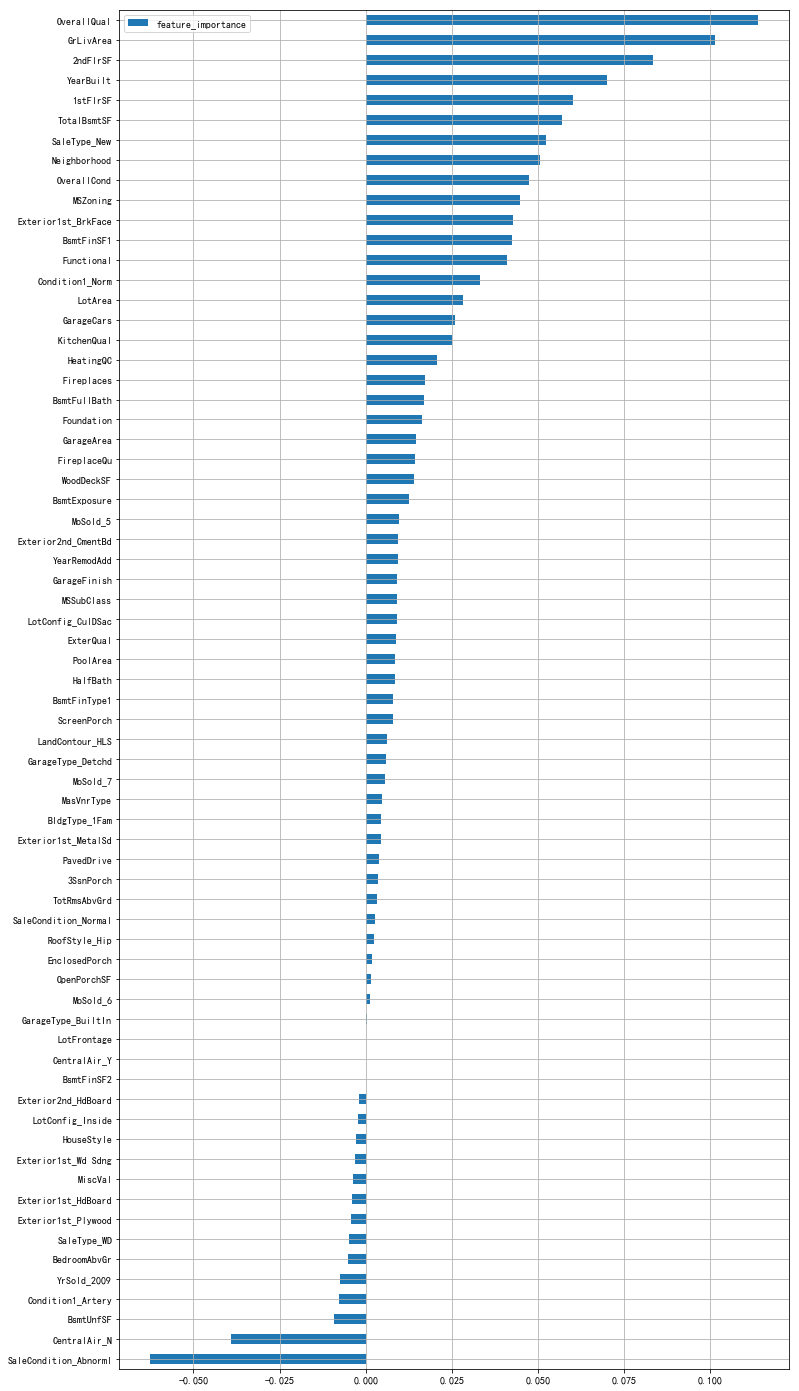

In [84]:
plt.figure()
lasso_fi[lasso_fi['feature_importance'] != 0].sort_values('feature_importance').plot(kind='barh', figsize=(12, 25))
plt.grid()
plt.show()

In [85]:
def add_feature(X):
    X['TotalHouse'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
    X['TotalArea'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF'] + X['GarageArea']
    X['TotalQuality'] = X['OverallQual'] + X['OverallCond']
    
    X['TotalHouse_OverallQual'] = X['TotalHouse'] * X['OverallQual']
    X['GrLivArea_OverallQual'] = X['GrLivArea'] * X['OverallQual']
    X['MSZoning_TotalHouse'] = X['MSZoning'] * X['TotalHouse']
    X['MSZoning_OverallQual'] = X['MSZoning'] + X['OverallQual']
    X['MSZoning_YearBuilt'] = X['MSZoning'] + X['YearBuilt']
    X['Neighborhood_TotalHouse'] = X['Neighborhood'] * X['TotalHouse']
    X['Neighborhood_OverallQual'] = X['Neighborhood'] + X['OverallQual']
    X['Neighborhood_YearBuilt'] = X['Neighborhood'] + X['YearBuilt']
    X['BsmtFinSF1_OverallQual'] = X['BsmtFinSF1'] * X['OverallQual']
    X['Functional_TotalHouse'] = X['Functional'] * X['TotalHouse']
    X['Functional_OverallQual'] = X['Functional'] + X['OverallQual']
    X['LotArea_OverallQual'] = X['LotArea'] * X['OverallQual']
    X['LotArea_TotalHouse'] = X['LotArea'] + X['TotalHouse']
    
    X['Bsmt'] = X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['BsmtUnfSF']
    X['PorchArea'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
    
    X['TotalPlace'] = X['TotalArea'] + X['PorchArea']

In [86]:
# 获取原数据
full_fe1 = full.copy()
full_fe1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,4,2,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,110,53,2008
1,1262,0,0,None,3,1Fam,4,5,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,83,26,2007
2,920,866,0,None,3,1Fam,4,3,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,108,52,2008
3,961,756,0,None,3,1Fam,5,2,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,25,20,2006
4,1145,1053,0,None,4,1Fam,4,4,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,107,50,2008


In [87]:
full_fe1.shape

(2917, 79)

In [88]:
# 增加特征
add_feature(full_fe1)

In [89]:
full_fe1.shape

(2917, 98)

In [90]:
full_fe1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Neighborhood_OverallQual,Neighborhood_YearBuilt,BsmtFinSF1_OverallQual,Functional_TotalHouse,Functional_OverallQual,LotArea_OverallQual,LotArea_TotalHouse,Bsmt,PorchArea,TotalPlace
0,856,854,0,None,3,1Fam,4,2,706.0,0.0,...,14,117,4942.0,7698.0,10,59150,11016.0,856.0,61,3175.0
1,1262,0,0,None,3,1Fam,4,5,978.0,0.0,...,14,91,5868.0,7572.0,9,57600,12124.0,1262.0,0,2984.0
2,920,866,0,None,3,1Fam,4,3,486.0,0.0,...,14,115,3402.0,8118.0,10,78750,13956.0,920.0,42,3356.0
3,961,756,0,None,3,1Fam,5,2,216.0,0.0,...,14,32,1512.0,7419.0,10,66850,12023.0,756.0,307,3422.0
4,1145,1053,0,None,4,1Fam,4,4,655.0,0.0,...,18,117,5240.0,10029.0,11,114080,17603.0,1145.0,84,4263.0


In [91]:
# 数据转换
full_numeric1 = full_fe1.select_dtypes(exclude='object')
skew1 = full_numeric1.apply(lambda x: x.skew())
skew_features1 = skew1[abs(skew1) >= 1].index
full_fe1[skew_features1] = np.log1p(full_fe1[skew_features1])

In [92]:
full_fe1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Neighborhood_OverallQual,Neighborhood_YearBuilt,BsmtFinSF1_OverallQual,Functional_TotalHouse,Functional_OverallQual,LotArea_OverallQual,LotArea_TotalHouse,Bsmt,PorchArea,TotalPlace
0,6.753438,854,0.0,None,3,1Fam,1.609438,1.098612,706.0,0.0,...,14,117,8.505728,7698.0,10,10.987849,9.307195,856.0,4.127134,3175.0
1,7.141245,0,0.0,None,3,1Fam,1.609438,1.791759,978.0,0.0,...,14,91,8.677440,7572.0,9,10.961295,9.403025,1262.0,0.000000,2984.0
2,6.825460,866,0.0,None,3,1Fam,1.609438,1.386294,486.0,0.0,...,14,115,8.132413,8118.0,10,11.274046,9.543736,920.0,3.761200,3356.0
3,6.869014,756,0.0,None,3,1Fam,1.791759,1.098612,216.0,0.0,...,14,32,7.321850,7419.0,10,11.110222,9.394660,756.0,5.730100,3422.0
4,7.044033,1053,0.0,None,4,1Fam,1.609438,1.609438,655.0,0.0,...,18,117,8.564268,10029.0,11,11.644664,9.775881,1145.0,4.442651,4263.0


In [93]:
# one-hot编码
full_fe1 = pd.get_dummies(full_fe1)

In [94]:
full_fe1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,6.753438,854,0.0,3,1.609438,1.098612,706.0,0.0,7,1.098612,...,1,0,1,1,0,0,0,1,0,0
1,7.141245,0,0.0,3,1.609438,1.791759,978.0,0.0,6,1.098612,...,1,0,1,1,0,0,1,0,0,0
2,6.825460,866,0.0,3,1.609438,1.386294,486.0,0.0,7,1.098612,...,1,0,1,1,0,0,0,1,0,0
3,6.869014,756,0.0,3,1.791759,1.098612,216.0,0.0,6,1.098612,...,1,0,1,1,0,1,0,0,0,0
4,7.044033,1053,0.0,4,1.609438,1.609438,655.0,0.0,7,1.098612,...,1,0,1,1,0,0,0,1,0,0


In [95]:
full_fe1.shape

(2917, 221)

In [96]:
# 分离训练集和测试集
n_train = train.shape[0]
train_X = full_fe1[:n_train]
test_X = full_fe1[n_train:]
train_y = train.SalePrice

#### Mark

In [97]:
train_X.shape, test_X.shape, train_y.shape

((1458, 221), (1459, 221), (1458,))

In [98]:
# robustscaler
scaler = RobustScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = np.log(train_y)

In [99]:
train_X[:5]

array([[-0.52251244,  1.17307692,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32982611,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.36421928,  1.18956044,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.26849361,  1.03846154,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1161691 ,  1.44642857,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

## 3.8 PCA

In [100]:
pca = PCA(n_components=205)

In [101]:
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)

In [102]:
train_X.shape, test_X.shape

((1458, 205), (1459, 205))

# 4. 建模

In [103]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return rmse

In [104]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]


In [105]:
cv_results = []
for name, model in zip(names, models):
    score = rmse_cv(model, train_X, train_y)
    cv_results.append(score)
    print('%s: %f (%f)' % (name, score.mean(), score.std()))

LR: 30432760806.495911 (60218135019.605858)
Ridge: 0.119528 (0.005174)
Lasso: 0.124111 (0.006167)
RF: 0.143162 (0.005537)
GBR: 0.129090 (0.005134)
SVR: 0.115052 (0.004843)
LinSVR: 0.122165 (0.004072)
Ela: 0.114038 (0.004970)
SGD: 0.156470 (0.016672)
Bay: 0.113648 (0.005204)
Ker: 0.110543 (0.005356)
Extra: 0.142684 (0.008484)
Xgb: 0.128844 (0.004210)


In [134]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

# lasso

In [135]:
grid(Lasso()).grid_get(train_X, train_y, {'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0009, 'max_iter': 10000} 0.11378249974790518
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.114465        0.001134
1  {'alpha': 0.0005, 'max_iter': 10000}         0.114194        0.001152
2  {'alpha': 0.0007, 'max_iter': 10000}         0.113926        0.001192
3  {'alpha': 0.0006, 'max_iter': 10000}         0.114032        0.001176
4  {'alpha': 0.0009, 'max_iter': 10000}         0.113782        0.001218
5  {'alpha': 0.0008, 'max_iter': 10000}         0.113813        0.001201


# ridge

In [136]:
grid(Ridge()).grid_get(train_X, train_y,{'alpha':[35,40,45,50,55,60,63,64,65,70,80,90]})

{'alpha': 63} 0.11303628816682663
           params  mean_test_score  std_test_score
0   {'alpha': 35}         0.113311        0.001204
1   {'alpha': 40}         0.113206        0.001207
2   {'alpha': 45}         0.113132        0.001210
3   {'alpha': 50}         0.113083        0.001213
4   {'alpha': 55}         0.113053        0.001216
5   {'alpha': 60}         0.113039        0.001220
6   {'alpha': 63}         0.113036        0.001222
7   {'alpha': 64}         0.113036        0.001223
8   {'alpha': 65}         0.113037        0.001223
9   {'alpha': 70}         0.113045        0.001227
10  {'alpha': 80}         0.113085        0.001234
11  {'alpha': 90}         0.113148        0.001240


# Kernel ridge

In [148]:
param_grid={'alpha':[0.4,0.5,0.6,0.7,0.8,0.9], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}
grid(KernelRidge()).grid_get(train_X, train_y,param_grid)

{'alpha': 0.9, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'} 0.10938679256712072
                                               params  mean_test_score  \
0   {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.110106   
1   {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.109933   
2   {'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'ker...         0.110424   
3   {'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'ker...         0.110285   
4   {'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kerne...         0.109667   
5   {'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'ker...         0.109964   
6   {'alpha': 0.6, 'coef0': 0.8, 'degree': 3, 'ker...         0.110641   
7   {'alpha': 0.6, 'coef0': 1, 'degree': 3, 'kerne...         0.109569   
8   {'alpha': 0.6, 'coef0': 1.2, 'degree': 3, 'ker...         0.109684   
9   {'alpha': 0.7, 'coef0': 0.8, 'degree': 3, 'ker...         0.111119   
10  {'alpha': 0.7, 'coef0': 1, 'degree': 3, 'kerne...         0.109578   
11  {'alpha': 0.7, 'coef0'

# Ela

In [143]:
grid(ElasticNet()).grid_get(train_X, train_y,{'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]})

{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 10000} 0.11386468801768054
                                               params  mean_test_score  \
0   {'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter'...         0.119506   
1   {'alpha': 0.0005, 'l1_ratio': 0.1, 'max_iter':...         0.119166   
2   {'alpha': 0.0005, 'l1_ratio': 0.3, 'max_iter':...         0.116609   
3   {'alpha': 0.0005, 'l1_ratio': 0.5, 'max_iter':...         0.115395   
4   {'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter':...         0.114701   
5   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.118047   
6   {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.117639   
7   {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.115366   
8   {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter':...         0.114407   
9   {'alpha': 0.0008, 'l1_ratio': 0.7, 'max_iter':...         0.114057   
10  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.114303   
11  {'alpha': 0.004, 'l1_ratio': 0.1, '

# SVR


In [154]:
grid(SVR()).grid_get(train_X, train_y,{'C':[16,18,19],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 19, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'} 0.11065131549078375
                                               params  mean_test_score  \
0   {'C': 16, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.111217   
1   {'C': 16, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.110743   
2   {'C': 16, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.111206   
3   {'C': 16, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.110700   
4   {'C': 18, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.111065   
5   {'C': 18, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.110741   
6   {'C': 18, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.111053   
7   {'C': 18, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.110654   
8   {'C': 19, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.111006   
9   {'C': 19, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.110719   
10  {'C': 19, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.110973   
11  {'C': 19, 'epsilon': 0.009

## 经过漫长的多轮测试，最后选择了这六个模型：
- lasso = Lasso(alpha=0.0009,max_iter=10000)
- ridge = Ridge(alpha=63)
- svr = SVR(gamma= 0.0004,kernel='rbf',C=19,epsilon=0.009)
- ker = KernelRidge(alpha=0.9 ,kernel='polynomial',degree=3 , coef0=1.2)
- ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
- bay = BayesianRidge()

In [178]:
lasso = Lasso(alpha=0.0009,max_iter=10000)
ridge = Ridge(alpha=63)
svr = SVR(gamma= 0.0004,kernel='rbf',C=19,epsilon=0.009)
ker = KernelRidge(alpha=0.9 ,kernel='polynomial',degree=3 , coef0=1.2)
ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
bay = BayesianRidge()


# Ensemble
## Weight Average
- Average base models according to their weights.

In [181]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [182]:
model_weight = [0.05, 0.2, 0.3, 0.35, 0.03, 0.07]
models = [lasso, ridge, svr, ker, ela, bay]
avg_w = AverageWeight(models, model_weight)

In [167]:
# 交叉验证评估
avg_score = rmse_cv(avg_w, train_X, train_y)
print(avg_score.mean())

0.10930763433994542


In [183]:
# 选择表现最好的两个模型建模：svr, ker
avg_w2 = AverageWeight(mod=[svr, ker], weight=[0.45, 0.55])

In [236]:
avg2_score = rmse_cv(avg_w2, train_X, train_y)
print(avg2_score.mean())

0.10861937077060183


# 两个模型的提交

In [187]:
avg_w2.fit(train_X, train_y)

AverageWeight(mod=[SVR(C=19, cache_size=200, coef0=0.0, degree=3, epsilon=0.009, gamma=0.0004,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), KernelRidge(alpha=0.9, coef0=1.2, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)],
       weight=[0.45, 0.55])

In [188]:
y_pred = np.exp(avg_w2.predict(test_X))

In [189]:
result = pd.DataFrame({'Id':test['Id'], 'SalePrice':y_pred})
result.to_csv('submission_avg.csv', index=False)

# STACKING

In [191]:
class stacking(BaseEstimator, RegressorMixin):
    def __init__(self, base_models, stack_model):
        self.base_models = base_models
        self.stack_model = stack_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
    
    def fit(self, X, y):
        # 注：这里要把数据转换成数组类型，避免传入的数据不是数组类型时报错
        X = np.array(X)
        y = np.array(y)
        
        self.saved_models = [list() for model in self.base_models]
        oof_train = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_idx, val_idx in self.kf.split(X, y):
                fit_model = clone(model)            
                fit_model.fit(X[train_idx], y[train_idx])
                self.saved_models[i].append(fit_model)
                oof_train[val_idx, i] = fit_model.predict(X[val_idx])
        
        self.stack_model.fit(oof_train, y)
        return self
    
    def predict(self, X):
        X = np.array(X)
        oof_test = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.saved_models):
            model_pred = np.column_stack([fit_model.predict(X) for fit_model in model])
            oof_test[:, i] = model_pred.mean(1)
        
        return self.stack_model.predict(oof_test)

In [192]:
stack_model = stacking(base_models=[lasso, ridge, svr, ker, ela, bay], stack_model=ker)

In [238]:
stack_score = rmse_cv(stack_model, train_X, train_y)
print(stack_score.mean())

0.10829601553922161


# Stacking 的提交

In [194]:
stack_model.fit(train_X, train_y)

stacking(base_models=[Lasso(alpha=0.0009, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=63, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_...True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)],
     stack_model=KernelRidge(alpha=0.9, coef0=1.2, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None))

In [195]:
stack_pred =np.exp(stack_model.predict(test_X))
result_s = pd.DataFrame({'Id':test['Id'], 'SalePrice':stack_pred})
result_s.to_csv('submmision_stack.csv', index=False)

# stacking 结合 get_oof
### 另一个链接的方法，可以将目前我们的MSE降低至0.104，原文降低至0.101，但是原文中说也许会存在过拟合。
- 原文链接为：https://github.com/massquantity/Kaggle-HousePrices/blob/master/HousePrices%20Kernel.ipynb

In [213]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        
        X = np.array(X)
        y = np.array(y)
        
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [215]:
a = Imputer().fit_transform(train_X)
b = Imputer().fit_transform(train_y.values.reshape(-1,1)).ravel()

In [216]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [217]:
print(rmse_cv(stack_model,a,b))
print(rmse_cv(stack_model,a,b).mean())

[0.10531723 0.10922068 0.11870218 0.10055597 0.10768402]
0.10829601553922161


## extract the features generated from stacking

In [220]:
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X)

In [222]:
X_train_stack.shape, a.shape

((1458, 6), (1458, 205))

In [228]:
X_train_add = np.hstack((a,X_train_stack))
X_test_add = np.hstack((test_X,X_test_stack))

### 原链接中为((1458, 416), (1459, 416))，猜测是前面数据过程处理时的不同导致shape 的不同。

In [226]:
X_train_add.shape, X_test_add.shape

((1458, 211), (1459, 211))

In [229]:
print(rmse_cv(stack_model,X_train_add,b))
print(rmse_cv(stack_model,X_train_add,b).mean())

[0.09903453 0.10657407 0.11354776 0.09757583 0.10679427]
0.1047052915821703


# stacking get_oof 提交


In [230]:
#这是训练集中目前误差最小的model，但并不确定在测试集上的表现。
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [231]:
stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.9, coef0=1.2, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
     mod=[Lasso(alpha=0.0009, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=63, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=No...True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)])

In [234]:
pred = np.exp(stack_model.predict(test_X))

In [239]:
result=pd.DataFrame({'Id':test.Id, 'SalePrice':pred})
result.to_csv("submission.csv",index=False)

# 最后我看了下stacking和stacking get _oof的结果，发现虽然后者的MSE降低了，但是对测试集的输出结果二者是完全相同的，很奇怪。